#  Drug Type Prediction Using Ada Boosting
##  Leveraging AdaBoost for Drug Classification: A Boosting Approach to Enhance Drug Discovery
Leveraging machine learning techniques like **AdaBoost** holds promise in enhancing this process. `AdaBoost`, an ensemble learning method, iteratively combines weak classifiers to create a robust model. Its adaptability to high-dimensional and nonlinear data makes it ideal for drug classification tasks. This brief explores the application of AdaBoost in drug type classification, highlighting its efficacy in discerning between different compound classes. Through AdaBoost, we aim to expedite drug discovery efforts, offering a potent tool to navigate the complexities of compound classification with precision and efficiency.

# Import Needed Library

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

# Data Collection

In [3]:
drug=pd.read_csv('Drug.csv')

In [4]:
drug.shape

(200, 6)

In [5]:
drug.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [45]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Explore The Data Set

In [7]:
drug.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug_Type       object
dtype: object

In [8]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64

In [9]:
drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug_Type'], dtype='object')

In [10]:
drug['Cholesterol'].nunique()

2

In [46]:
drug['Drug_Type'].nunique()

5

# Data Analysis And Visualization

<Axes: xlabel='Drug_Type', ylabel='Age'>

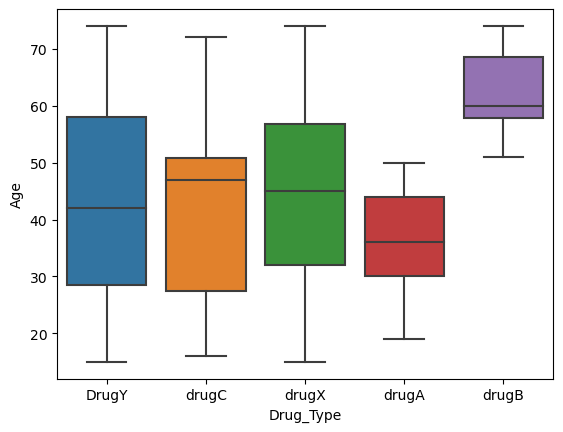

In [14]:
sns.boxplot(x=drug['Drug_Type'],y=drug["Age"])

<Axes: xlabel='Age', ylabel='BP'>

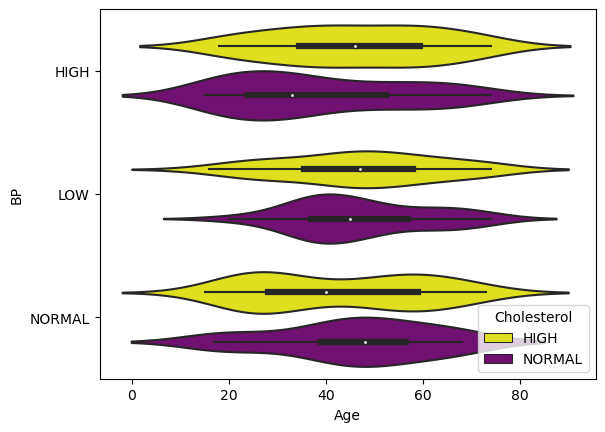

In [15]:
sns.violinplot(x=drug['Age'],y=drug['BP'],hue=drug['Cholesterol'],palette=['yellow','purple'])

<Axes: xlabel='Drug_Type', ylabel='Count'>

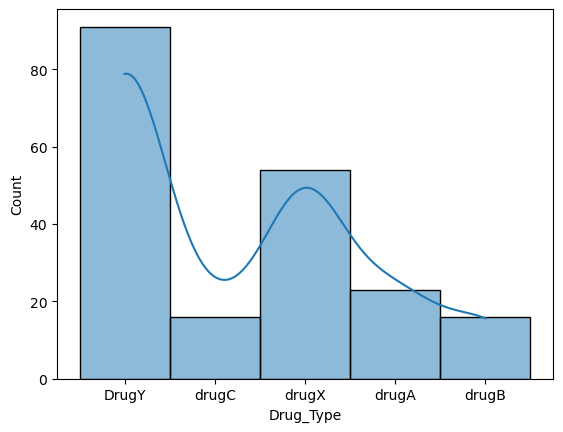

In [16]:
sns.histplot(x=drug['Drug_Type'],kde=True)

Text(0, 0.5, 'Age')

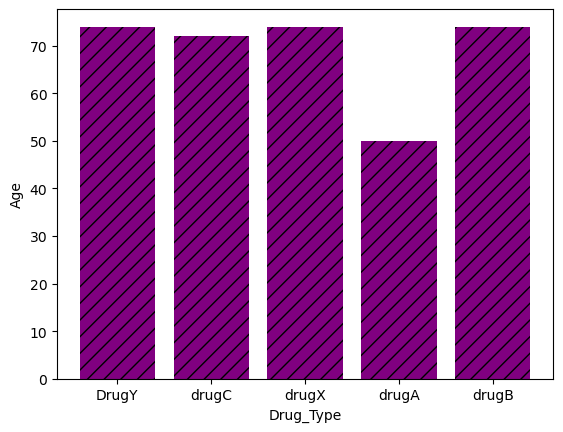

In [18]:
plt.bar(drug['Drug_Type'],drug["Age"],color='purple',linestyle='-',label='bar',hatch='//', linewidth=3)
plt.xlabel('Drug_Type')
plt.ylabel("Age")


<Axes: xlabel='Drug_Type', ylabel='Na_to_K'>

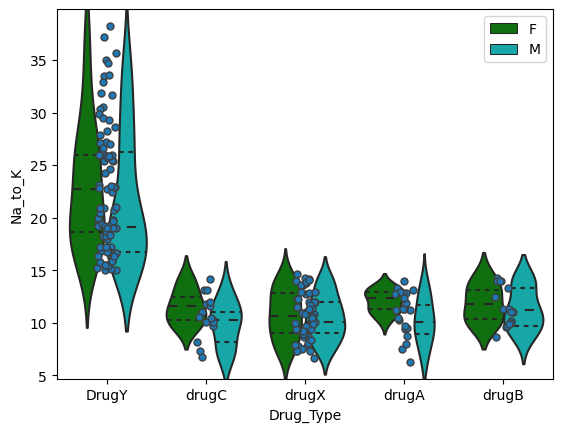

In [34]:
sns.violinplot(x='Drug_Type',y='Na_to_K',data=drug,hue=drug['Sex'],palette=['green','c'],inner='quartile')
sns.stripplot(x='Drug_Type',y='Na_to_K',data=drug,linewidth=1)

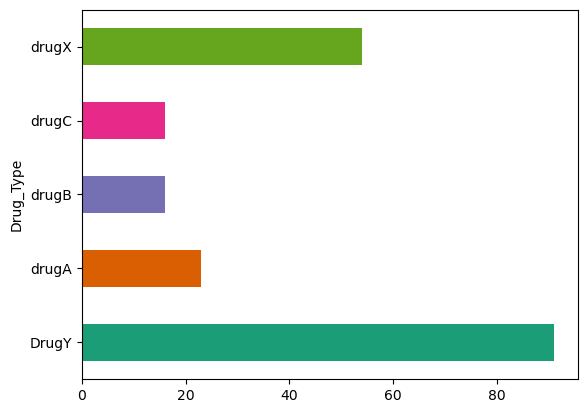

In [42]:
drug.groupby('Drug_Type').size().plot(kind='barh',color=sns.palettes.mpl_palette("Dark2"))
plt.gca().spines[['top','right']].set_visible(True)

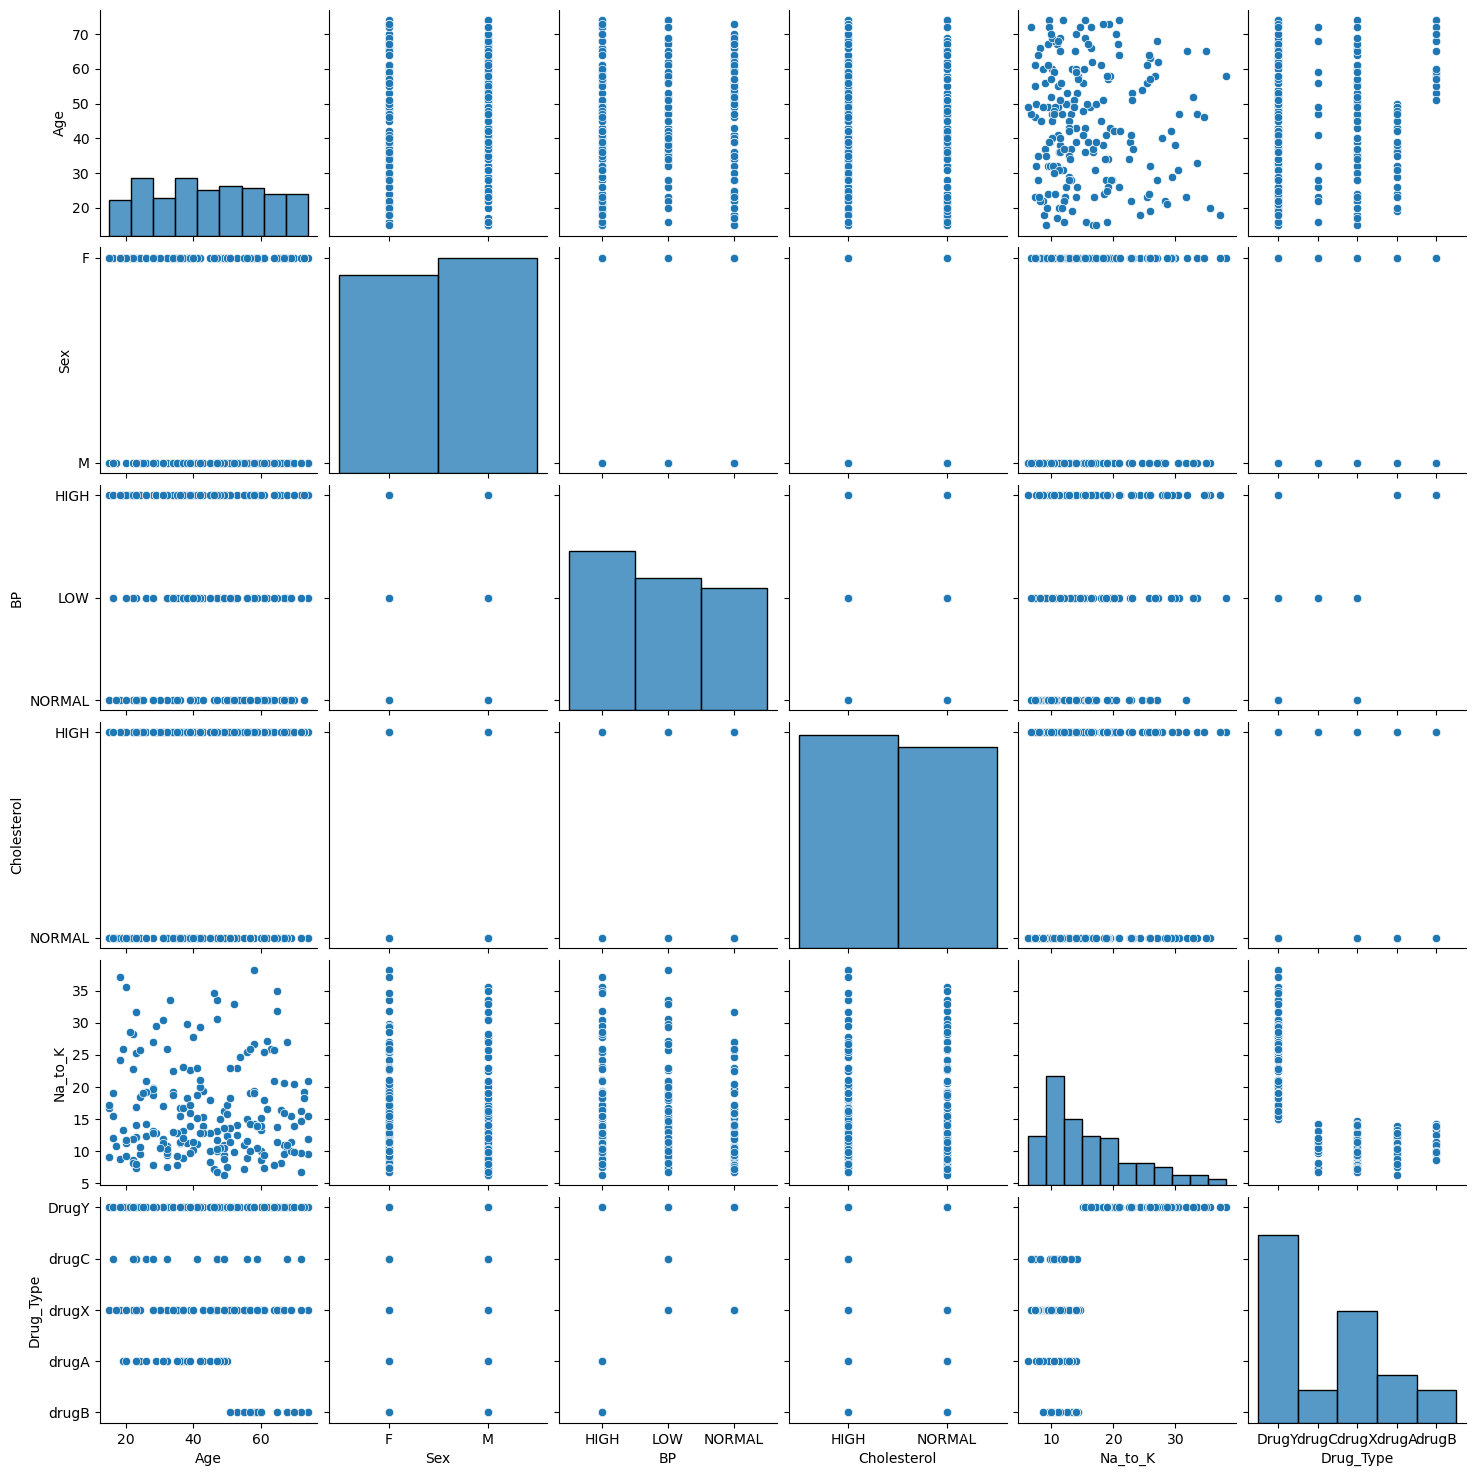

In [43]:
sns.pairplot(vars=drug,data=drug)

# Data Cleaning

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [51]:
def To_apply_encoder(column):
    drug[column]=encoder.fit_transform(drug[column])
    

In [52]:
for i in ['Sex','BP','Cholesterol','Drug_Type']:
    To_apply_encoder(i)
    

In [54]:
drug.head(4)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4


In [56]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64

# Algorith apply

In [83]:
x=drug.drop('Drug_Type',axis=1)

In [84]:
y=drug['Drug_Type']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(160, 5)
(160,)
(40, 5)
(40,)


score 0.83125
Accuracy: 0.875
Mean Squared Error: 0.125
Mean Absolute Error: 0.125
[[18  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  0  0  3]
 [ 0  0  0  0 16]]
[0 0 4 0 1 0 4 0 4 0 4 4 4 4 4 0 4 0 0 4 0 0 4 4 4 0 4 0 0 4 4 0 4 1 0 4 1
 0 4 0]


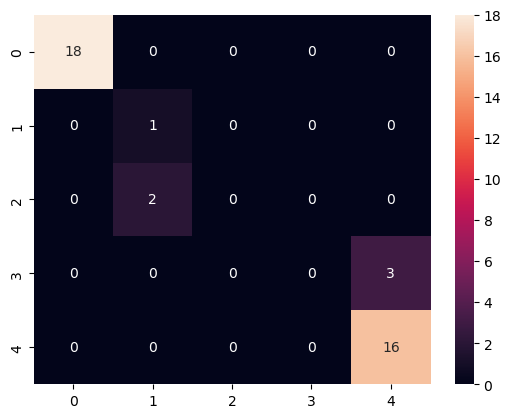

In [88]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
Ada=AdaBoostClassifier()
Ada.fit(X_train,y_train)
y_pred=Ada.predict(X_test)
print(f'''score {Ada.score(X_train,y_train)}''')
ACC=accuracy_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('Accuracy:',ACC)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
cnc=confusion_matrix(y_test,y_pred)
print(cnc)
sns.heatmap(cnc,annot=True)
print(y_pred)







In [89]:
actual_value=y_test
predicted=y_pred
print("Actual Values:",actual_value[:5])
print("predicted Values:",predicted[:5])

Actual Values: 185    0
97     0
116    4
90     0
108    2
Name: Drug_Type, dtype: int32
predicted Values: [0 0 4 0 1]


Text(0, 0.5, 'Predicted Value')

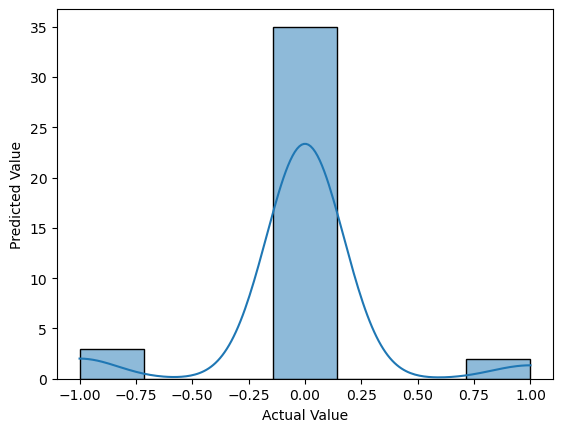

In [90]:
actual_value=y_test
predicted=y_pred
sns.histplot(actual_value-predicted,kde=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

# Conclusion
 `AdaBoost` emerges as a potent ally in drug prediction, offering a robust framework for accurate compound classification. Its adaptability to complex data, coupled with its ability to handle high-dimensional feature spaces, makes it invaluable in drug discovery. By harnessing AdaBoost, we can expedite candidate identification while minimizing errors, thus accelerating the path towards safer and more effective therapeutics. As we continue to refine machine learning methodologies, AdaBoost stands at the forefront, poised to revolutionize drug discovery and usher in a new era of precision medicine. Through continued research and application, AdaBoost holds the potential to significantly impact healthcare outcomes and improve patient well-being.



